# Basic Classifiers

Fitting simply classifiers as baseline

* [Linear Regression](#Linear-Regression)
* [Decision Tree Classifier](#Decision-Tree-Classifier)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [2]:
teledf = pd.read_csv('data/teledf_final.csv', index_col = 0)
teledf.head()

,Total day charge,Total intl calls,Area code_415,Area code_510,Total eve minutes,Total day minutes,Total day calls,Voice mail plan,Area code_408,Customer service calls,International plan,Churn,Number vmail messages,Total intl minutes,Total intl charge,Total eve charge
0,45.07,3.0,1.0,0.0,197.4,265.1,110.0,1.0,0.0,1.0,0.0,0.0,25.0,10.0,2.70,16.78
1,27.47,3.0,1.0,0.0,195.5,161.6,123.0,1.0,0.0,1.0,0.0,0.0,26.0,13.7,3.70,16.62
2,41.38,5.0,1.0,0.0,121.2,243.4,114.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,3.29,10.30
3,50.90,7.0,0.0,0.0,61.9,299.4,71.0,0.0,1.0,2.0,1.0,0.0,0.0,6.6,1.78,5.26
4,28.34,3.0,1.0,0.0,148.3,166.7,113.0,0.0,0.0,3.0,1.0,0.0,0.0,10.1,2.73,12.61


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [14]:
X=teledf.drop(columns='Churn')
y=teledf['Churn']

X_rest, X_test, y_rest, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val=train_test_split(X_rest, y_rest, test_size=0.2, random_state=42)

# Logistic Regression

In [5]:
lr=LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

C:\Users\AK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
lr.score(X_train,y_train), lr.score(X_val, y_val)

(0.8578799249530957, 0.848314606741573)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

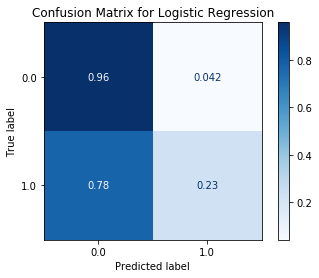

In [21]:
plot_confusion_matrix(lr, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for Logistic Regression')

# Decision Tree Classifier

In [10]:
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [17]:

dtc.score(X_train,y_train), dtc.score(X_val, y_val)

(1.0, 0.9082397003745318)

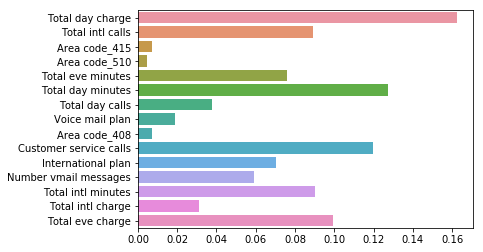

In [18]:
sns.barplot(y=X.columns,x=dtc.feature_importances_)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

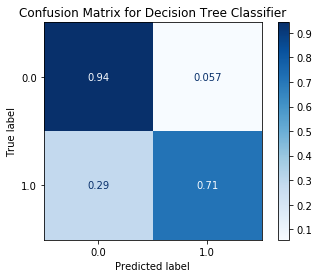

In [20]:
plot_confusion_matrix(dtc, 
                      X_val,
                      y_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Decision Tree Classifier')